## Домашнее задание

1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

###  Задача 1
ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

### Задача 2.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('water.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


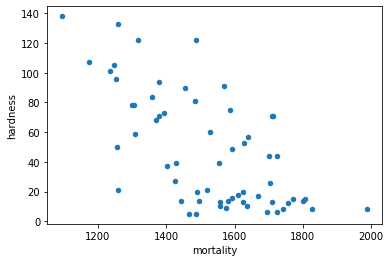

In [15]:
df.plot(kind='scatter', x='mortality', y='hardness')

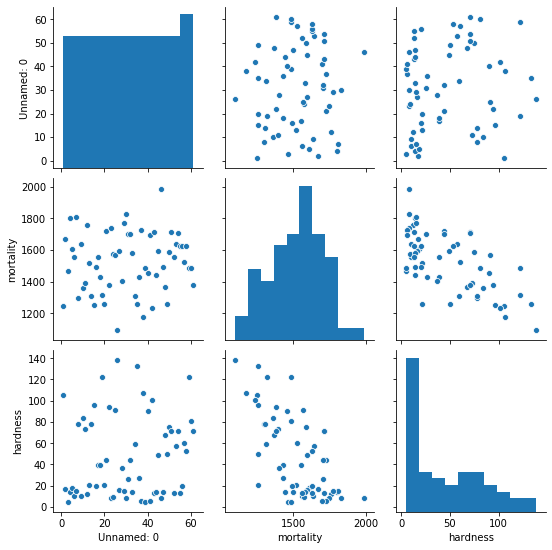

In [16]:
sns.pairplot(df)

In [17]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [18]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [19]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


По итогам расчета коэфицентов и прогона данных:
Связь между жесткостью и смертностью:
* есть
* она обратная
* сила связи средняя.

Что видно и по scaterplot графику. 
Точки формируются вокруг прямой , но при этом рассеяны вокруг неё, но не сильно.

Но в целом если сформировать чем ниже жесткость воды, тем выше смертность(исходя из данных и коэфицентов), можно сказать что на смертность влияют другие факторы.

Коэффицент Кендела показывает что связь ниже средней.



### Регресионный анализ

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X = df[['hardness']]
y = df['mortality']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [23]:
X_train.shape

(51, 1)

In [24]:
y_train.shape

(51,)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.coef_

array([-3.28204413])

In [27]:
y_pred = model.predict(X_test)
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1337.012988,1247
5,10,1648.807180,1558
46,14,1635.679003,1495
31,44,1537.217679,1702
13,78,1425.628179,1307
55,20,1615.986738,1625
34,133,1245.115752,1259
49,75,1435.474311,1587
12,21,1612.704694,1519
40,6,1661.935356,1696


### Коэффицент детерминации построенной регресионной модели

In [28]:
model.score(X_test, y_test)

0.5836552585473939

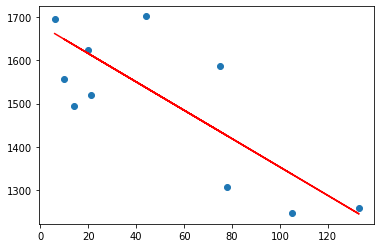

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Построим график остатков

In [30]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
X_const = sm.add_constant(X_train)

In [34]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     33.20
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           5.44e-07
Time:                        18:07:59   Log-Likelihood:                -326.76
No. Observations:                  51   AIC:                             657.5
Df Residuals:                      49   BIC:                             661.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1681.6276     33.778     49.784      0.0

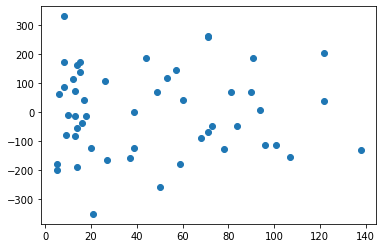

In [35]:
# Построим график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

### Задача 2

In [44]:
df.head(2)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17


#### Посмотрим коэффиценты кореляции

In [65]:
print (f" Для Юга \n \
       Пирсона: \n {df[df['location']=='South'][['mortality','hardness']].corr()} \n \
       Спирмана: \n {df[df['location']=='South'][['mortality','hardness']].corr(method='spearman')} \n \
       Кендала: \n {df[df['location']=='South'][['mortality','hardness']].corr(method='kendall')} \n\n \
Для Севера \n \
       Пирсона: \n {df[df['location']=='North'][['mortality','hardness']].corr()} \n \
       Спирмана: \n {df[df['location']=='North'][['mortality','hardness']].corr(method='spearman')} \n \
       Кендала: \n {df[df['location']=='North'][['mortality','hardness']].corr(method='kendall')}")

 Для Юга 
        Пирсона: 
            mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000 
        Спирмана: 
            mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000 
        Кендала: 
            mortality  hardness
mortality   1.000000 -0.440315
hardness   -0.440315  1.000000 

 Для Севера 
        Пирсона: 
            mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000 
        Спирмана: 
            mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000 
        Кендала: 
            mortality  hardness
mortality   1.000000 -0.283058
hardness   -0.283058  1.000000


Text(0.5, 1.0, 'Для Южных городов')

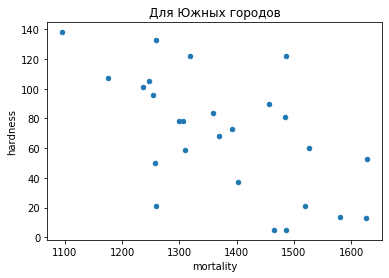

In [68]:
df[df['location']=='South'].plot(kind='scatter', x='mortality', y='hardness')
plt.title('Для Южных городов')

Text(0.5, 1.0, 'Для северных городов')

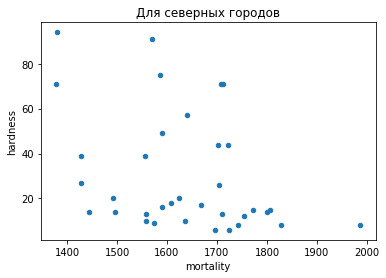

In [69]:
df[df['location']=='North'].plot(kind='scatter', x='mortality', y='hardness')
plt.title('Для северных городов')

Связь у групп городов ниже чем в целом по Англии.

Причем у Южные она также выше среднего и обратная.

А у Северных более слабая, и также обратная.

Зависимость сохраняется только по Южным городам. По Северным нет.

In [70]:
dfn = df[df['location']=='North']
dfs = df[df['location']=='South']

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [77]:
X_s = dfs[['hardness']]
y_s = dfs['mortality']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.15, random_state=42)
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)
model_s.score(X_test_s, y_test_s)

-0.7091284596403673

У Юга и гораздо лучше коэфицент детерминации чем в общем...
По Северу будет все плохо...

In [78]:
X_n = dfn[['hardness']]
y_n = dfn['mortality']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.15, random_state=42)

model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)
model_n.score(X_test_n, y_test_n)

-0.11081361475476205

Да по Северу коэфицент говорит что модель не очень :)
Предположительно у Южных городов есть еще факторы которые влияют на Сметность и они тянут всю страну в том числе.

In [79]:
X_const_s = sm.add_constant(X_train_s)
X_const_n = sm.add_constant(X_train_n)

In [80]:
model_s = sm.OLS(y_train_s, X_const_s)
results_s = model_s.fit()
model_n = sm.OLS(y_train_n, X_const_n)
results_n = model_n.fit()

print(results_s.summary())
print()
print(results_n.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     15.70
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           0.000768
Time:                        18:42:09   Log-Likelihood:                -133.97
No. Observations:                  22   AIC:                             271.9
Df Residuals:                      20   BIC:                             274.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1546.6811     49.368     31.330      0.0

Text(0.5, 1.0, 'Для южных городов')

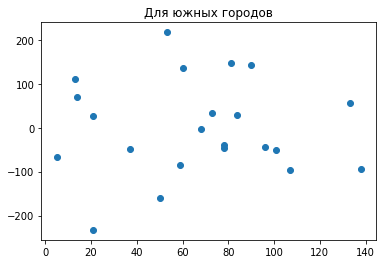

In [83]:
plt.scatter(X_const_s.iloc[:, 1], results_s.resid)
plt.title('Для южных городов')

Text(0.5, 1.0, 'Для северных городов')

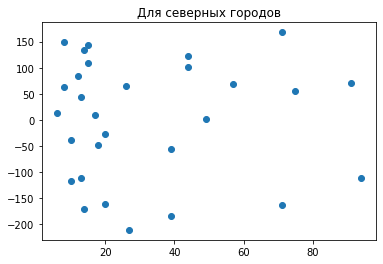

In [82]:
plt.scatter(X_const_n.iloc[:, 1], results_n.resid)
plt.title('Для северных городов')